# Mathematics of Neural Networks

In [155]:
from scipy.optimize import approx_fprime
import numpy as np
import matplotlib.pyplot as plt
import time

# %matplotlib notebook
%matplotlib inline

## Define the network

### Forward

In [156]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def linear(x):
    return x

def feed_forward(x, W, b, act):
    a = [x]
    z = [x]
    for i, (Wi, bi, acti) in enumerate(zip(W, b, act)):
        z.append(np.dot(Wi, a[i]) + bi)
        a.append(acti(z[-1]))
    
    return a, z

def loss(y, y_star):
    return 0.50 * np.linalg.norm(y - y_star)**2

#### Generate random input data

In [157]:
# generate sample input
np.random.seed(10)

def init_params(ni,nh,no):
    W = [np.random.randn(nh,ni),np.random.randn(no,nh)]
    b = [np.random.randn(nh),np.random.randn(no)]
    return W,b

# set number of hidden units
ni = 3
nh = 4
no = 2
# input and groundtruth labels
ipt = np.random.randn(ni)
y_star = np.random.randn(no)


W,b = init_params(ni=ni,nh=nh,no=no)

# define activation functions
activations = [sigmoid, linear]

In [158]:
print(ipt)
print(W)
print(W[0].shape)
print(W[1].shape)
print(b[0].shape)
print(b[1].shape)

[ 1.3315865   0.71527897 -1.54540029]
[array([[-0.72008556,  0.26551159,  0.10854853],
       [ 0.00429143, -0.17460021,  0.43302619],
       [ 1.20303737, -0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761, -1.13660221]]), array([[ 0.13513688,  1.484537  , -1.07980489, -1.97772828],
       [-1.7433723 ,  0.26607016,  2.38496733,  1.12369125]])]
(4, 3)
(2, 4)
(4,)
(2,)


In [159]:
print(b)
print(b[0].shape)
print(b[1].shape)


[array([ 1.67262221,  0.09914922,  1.39799638, -0.27124799]), array([ 0.61320418, -0.26731719])]
(4,)
(2,)


#### Check feed forward

In [160]:
# evaluate input
a, z = feed_forward(ipt, W, b, activations)

In [161]:
print(z)
print(z[0].shape)
print(z[1].shape)
print(z[2].shape)

[array([ 1.3315865 ,  0.71527897, -1.54540029]), array([ 0.73592993, -0.68922303,  0.72055846,  2.10809577]), array([-1.28922081,  1.2493225 ])]
(3,)
(4,)
(2,)


In [162]:
print(a)
print(a[0].shape)
print(a[1].shape)
print(a[2].shape)

[array([ 1.3315865 ,  0.71527897, -1.54540029]), array([0.6761052 , 0.33420594, 0.67272998, 0.89168756]), array([-1.28922081,  1.2493225 ])]
(3,)
(4,)
(2,)


### Backward 

In [163]:
def d_sigmoid(x):
    act = sigmoid(x)
    return act * (1 - act)

def d_linear(x):
    return 1.

def d_loss(y, y_star):
    return y - y_star

def back_prop(y_star, W, b, d_act, a, z):
    # compute deltas in reversed order
    assert(len(a) == len(z))
    delta = [None] * len(a)
    delta[-1] = d_act[-1](z[-1]) * d_loss(a[-1], y_star) # delta_L
    for l in range(len(a) - 2, 0, -1):
        delta[l] = d_act[l-1](z[l]) * W[l].T.dot(delta[l+1])
                               
    # compute gradient in W an b
    dW = [None] * len(a)
    db = [None] * len(a)
    for l in range(len(a) - 1):
        dW[l] = np.outer(delta[l+1], a[l])
        db[l] = delta[l+1]
        
    return dW, db, delta

#### Compute backward pass (=compute gradient)

In [164]:
# compute gradient
d_act = [d_sigmoid, d_linear]
dW, db, delta = back_prop(y_star, W, b, d_act, a, z)

asmkdmaksd1


In [165]:
dW

[array([[-0.3697205 , -0.19860017,  0.42908678],
        [-0.51388159, -0.27603817,  0.59639592],
        [ 0.84455257,  0.45366237, -0.98016297],
        [ 0.4165297 ,  0.22374433, -0.48341216]]),
 array([[-0.86598054, -0.42806332, -0.86165743, -1.14210639],
        [ 0.42458496,  0.20987682,  0.42246537,  0.55996777]]),
 None]

In [166]:
db

[array([-0.27765414, -0.38591679,  0.63424536,  0.31280709]),
 array([-1.28083696,  0.62798653]),
 None]

#### Gradient check

In [167]:
# define forward function
def f(x, ipt, y_star):
#     W0 = x[:4].reshape(4,1)
#     W1 = x[4:8].reshape(1,4)
#     b0 = x[8:12]
#     b1 = x[12:]
    W0 = x[:12].reshape(4,3)
    W1 = x[12:20].reshape(2,4)
    b0 = x[20:24]
    b1 = x[24:]
    
    W = [W0, W1]
    b = [b0, b1]
    a, z = feed_forward(ipt, W, b, activations)
    L = loss(a[-1], y_star)
    return L

In [168]:
# compute approximate gradient
x_init = np.concatenate((W[0].ravel(), W[1].ravel(), b[0].ravel(), b[1].ravel()))
grads = approx_fprime(x_init, f, 1e-6, ipt, y_star)

In [169]:
# dW0 = grads[:4].reshape(4,1)
dW0 = grads[:12].reshape(4,3)
dW0

array([[-0.36972029, -0.1986001 ,  0.42908708],
       [-0.5138816 , -0.27603817,  0.5963959 ],
       [ 0.84455267,  0.4536624 , -0.98016284],
       [ 0.41652952,  0.22374428, -0.4834124 ]])

In [170]:
# dW1 = grads[4:8].reshape(1,4)
dW1 = grads[12:20].reshape(2,4)
dW1

array([[-0.86598031, -0.42806326, -0.8616572 , -1.14210599],
       [ 0.42458519,  0.20987688,  0.42246559,  0.55996817]])

In [171]:
# db0 = grads[8:12]
db0 = grads[20:24]
db0

array([-0.27765401, -0.3859168 ,  0.63424542,  0.31280699])

In [172]:
# db1 = grads[12:]
db1 = grads[24:]
db1

array([-1.28083647,  0.62798703])

In [173]:
# compare approximate gradient with backprop implemenation
# allclose checkes whether the difference between elements in two arrays is less than an epsilon
np.allclose(dW[0], dW0), np.allclose(dW[1], dW1), np.allclose(db[0], db0), np.allclose(db[1], db1)

(True, True, True, True)

## Learning a simple regression task

### Generate and visualize data

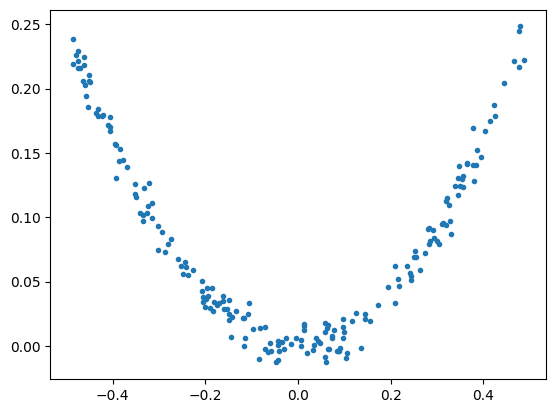

In [174]:
# generate data samples: 1d nonlinear function fitting
n = 200  
x = np.random.uniform(low=-0.5,high=0.5,size=n)
ystar = x**2 + 0.01*np.random.randn(n)

plt.figure()
plt.plot(x,ystar,'.')
plt.show()

### Learn the mapping

2.2341466451737073
1.2200478188751218
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
asmkdmaksd1
as

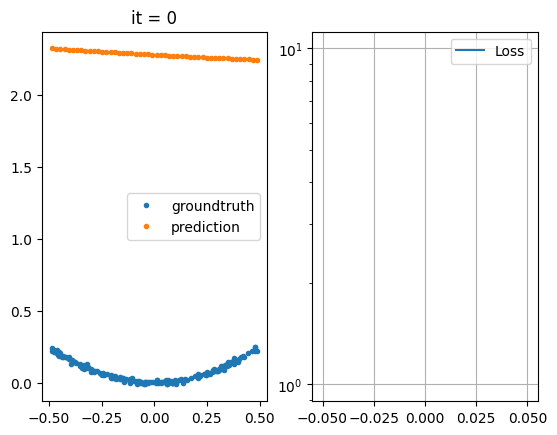

In [175]:
np.random.seed(10)
W, b = init_params(ni=1,nh=6,no=1)

print(W[0].sum() + W[1].sum())
print(b[0].sum() + b[1].sum())
alpha = 1e0
max_it = 1
L = np.zeros(max_it)

fig1 = plt.figure(1)
for it in range(max_it):
    
    # iterate over all smaples and sum up gradient
    dW = [0, 0]
    db = [0, 0]
    y_plot = []
    for xi, yi in zip(x, ystar):
        ai, zi = feed_forward([xi], W, b, activations)

        dWi, dbi, delta = back_prop([yi], W, b, d_act, ai, zi)
        L[it] += loss(ai[-1], yi) / n
        
        y_plot.append(ai[-1])
    
        # sum up gradients
        for idx in range(2):
            dW[idx] += (dWi[idx] / n)
            db[idx] += (dbi[idx] / n)  
    
    if it % 500 == 0:
        print ('it=', it, 'loss=', L[it])

        x_test = np.linspace(x.min(),x.max(),50)
        y_test = [feed_forward([xi], W, b, activations)[1][-1] for xi in x_test]

        plt.clf()
        fig1 = plt.gcf()
        plt.subplot(121)

        plt.plot(x,ystar,'.',label='groundtruth')
        plt.plot(x_test,y_test,'.',label='prediction')
        plt.legend(loc='best')
        plt.title('it = ' + str(it))
        fig1.canvas.draw()
        
        plt.subplot(122)
        plt.plot(L[:it], label='Loss') 
        plt.grid(True)
        plt.yscale('log')
        plt.legend(loc='best')
        fig1.canvas.draw()

        time.sleep(0.5)

        
    # do gradient step
    for idx in range(2):
        W[idx] = W[idx] - alpha * dW[idx]
        b[idx] = b[idx] - alpha * db[idx]
    